<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#analystdf = pd.read_csv("careersfuture_dataanalyst1.csv", index_col=0)
#scientistdf = pd.read_csv("careersfuture_datascientist1.csv", index_col=0)
#engineerdf = pd.read_csv("careersfuture_dataengineer1.csv", index_col=0)
#analyticsdf = pd.read_csv("careersfuture_dataanalytics1.csv", index_col=0)
#bigdatadf = pd.read_csv("careersfuture_bigdata1.csv", index_col=0)
#bizanalystdf = pd.read_csv("careersfuture_businessanalyst1.csv", index_col=0)
#architectdf = pd.read_csv("careersfuture_dataarchitect1.csv", index_col=0)
#databasedf = pd.read_csv("careersfuture_databaseadministrator1.csv", index_col=0)
#finaldf = pd.concat([analystdf, engineerdf, scientistdf, analyticsdf, bigdatadf, bizanalystdf, architectdf, databasedf])
#finaldf.to_csv("careersfuture.csv")

In [3]:
finaldf = pd.read_csv("careersfuture.csv", index_col=0)

In [4]:
# Dropping rows with either blank or 0 salary information
finaldf = finaldf.drop(index=finaldf[finaldf["Min Salary"].isna()].index).reset_index(drop=True)
finaldf = finaldf.drop(index=finaldf[finaldf["Min Salary"] == 0].index).reset_index(drop=True)

# Dropping duplicates with exact same Job ID from web scraping
finaldf = finaldf.drop_duplicates(["Job ID"]).reset_index(drop=True)
finaldf = finaldf.drop(["Job ID", "URL"], axis=1)

# Dropping duplicates which have same Job Title from same Company and Job Type
finaldf = finaldf.drop_duplicates(["Job Title", "Job Type", "Company Name"]).reset_index(drop=True)

In [5]:
finaldf

,Job Title,Job Type,Company Name,Job Location,Job Level,Job Industry,Min Salary,Max Salary,Salary Paid,Date Posted,Contract,Internship,Temporary,Permanent,Job Description,Job Requirements,Search
0,Data Analyst (JD#4652),"Permanent, Contract",Company Undisclosed,NaN,Executive,Banking and Finance,3000.0,5000.0,Monthly,01 Nov 2018,1,0,0,1,A challenging opportunity awaits you! Our clie...,Mandatory Skill-set Bachelor’s degree in Info...,Data Analyst
1,Risk Manager,Full Time,ADYEN SINGAPORE PTE. LTD.,30 HILL STREET 179360,Manager,"Risk Management, Information Technology",7000.0,7000.0,Monthly,01 Nov 2018,0,0,0,0,Ordering a pizza? Buying a pair of trainers? W...,You will: Execute risk assessments and (data...,Data Analyst
2,BI Consultant,Full Time,INTELLECT MINDS PTE. LTD.,"ANSON CENTRE, 51 ANSON ROAD 079904",Executive,Information Technology,6500.0,8000.0,Monthly,31 Oct 2018,0,0,0,0,Company Overview Intellect Minds is a Singapor...,Requirement and Qualification Bachelor’s Degr...,Data Analyst
3,Actuarial Data Analyst,Permanent,Company Undisclosed,NaN,"Professional, Executive",Banking and Finance,3500.0,4000.0,Monthly,31 Oct 2018,0,0,0,1,This role requires the use of available system...,A degree with majors in Actuarial Science Tec...,Data Analyst
4,2019 Market Data Analyst,Permanent,BLOOMBERG SINGAPORE PTE. LTD.,"ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989","Fresh/entry level, Junior Executive","Banking and Finance, Information Technology",75000.0,85000.0,Annually,30 Oct 2018,0,0,0,1,You're the type of person who has a passion fo...,You'll need to have: Bachelor's degree or eq...,Data Analyst
5,Data Analyst,Contract,ALLEGIS GLOBAL SOLUTIONS (SINGAPORE) PTE. LTD.,"SUNTEC TOWER FIVE, 5 TEMASEK BOULEVARD 038985",Senior Executive,Banking and Finance,5000.0,10000.0,Monthly,30 Oct 2018,1,0,0,0,Allegis Global Solutions is the exclusive Cont...,The successful candidate will be responsible...,Data Analyst
6,Data Analytics Lead,Permanent,TRAVELOKA SERVICES PTE. LTD.,"ROBINSON 77, 77 ROBINSON ROAD 068896",Manager,Information Technology,8300.0,15000.0,Monthly,30 Oct 2018,0,0,0,1,"You will be responsible for defining, collecti...",We are looking for someone with: Passion in d...,Data Analyst
7,Data Analyst,Full Time,COGNIZANT TECHNOLOGY SOLUTIONS ASIA PACIFIC PT...,"PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...","Manager, Professional",Information Technology,7000.0,10300.0,Monthly,29 Oct 2018,0,0,0,0,Understanding Bank’s Trade Finance Applicatio...,At least 8 years with IT projects and 5 years...,Data Analyst
8,"IT Security Analyst (VPN, Firewall, Proxy, Dat...","Contract, Full Time",TECHCOM SOLUTIONS & CONSULTANCY PTE. LTD.,"SHENTON HOUSE, 3 SHENTON WAY 068805",Middle Management,"Banking and Finance, Information Technology",5500.0,7000.0,Monthly,29 Oct 2018,1,0,0,0,"Hands on experience on Firewall, VPN, Proxy (...","Minimum of 5 years of experience on Firewall,...",Data Analyst
9,"Systems and Data Analyst, Manager (Procurement...","Permanent, Contract, Full Time",Company Undisclosed,NaN,"Middle Management, Manager, Professional",Information Technology,4500.0,9000.0,Monthly,27 Oct 2018,1,0,0,1,- Assist with the design and implementation of...,- Bachelors of Engineering / Supply Chain - 5 ...,Data Analyst


In [6]:
# Total number of records remaining after removing duplicates and blank rows
len(finaldf)

740

In [7]:
# Removing special characters in every text in Job Description
specialchar = ["\xa0", "\uf0b7", "\t", "· ", "\r\n"]
for c in specialchar:
    finaldf["Job Description"] = finaldf["Job Description"].map(lambda x: x.replace(c, "").lower())

In [8]:
# Creating Mean Salary column as the aggregated figure to classify
finaldf["Mean Salary"] = (finaldf["Max Salary"] + finaldf["Min Salary"])/2

In [9]:
# Checking if there are any duplicated unique Job Titles
finaldf["Job Title"].value_counts()

Business Analyst                                                                                         44
Data Scientist                                                                                           28
Senior Business Analyst                                                                                  16
Data Engineer                                                                                            16
Data Analyst                                                                                             11
Database Administrator                                                                                   11
Manager                                                                                                   5
Senior Data Scientist                                                                                     5
Information Technology Business Analyst                                                                   4
Human Resource Executive    

In [10]:
# Salary > 30k a month is quite unlikely realistically, to recognize as Annual salary instead
finaldf.loc[finaldf[finaldf["Mean Salary"] > 30000].index, "Salary Paid"] = "Annually"
finaldf.loc[finaldf[finaldf["Salary Paid"] == "Annually"].index, "Mean Salary"] = finaldf.loc[finaldf[finaldf["Salary Paid"] == "Annually"].index, "Mean Salary"].apply(lambda x: x/12)
finaldf.loc[finaldf[finaldf["Salary Paid"] == "Annually"].index, "Salary Paid"] = "Monthly"
# Salary Paid unknown, imputed as Monthly
finaldf.loc[finaldf[finaldf["Salary Paid"].isna()].index, "Salary Paid"] = "Monthly"

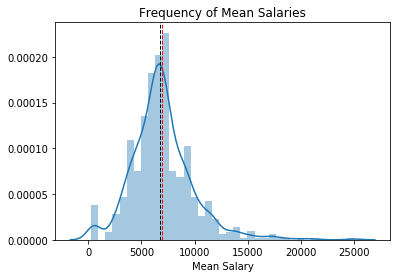

In [11]:
# Plotting the distribution of Mean Salary after processing
sns.distplot(finaldf["Mean Salary"])
plt.title("Frequency of Mean Salaries")
plt.axvline(finaldf["Mean Salary"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(finaldf["Mean Salary"].median(), color='black', linestyle='dashed', linewidth=1)
plt.show()

#### For the distribution of  Mean Salaries, the mean (red line) is greater than the median (black line), due to the presence of some extreme values.
- In this case, I will classify Mean Salary into 2 classes.
- Class 0 represents below or equal Median, Class 1 represents above Median.
- Reason is to identify if model can predict the correct class given certain features.

In [12]:
print("Median:", finaldf["Mean Salary"].median(), end=", ")
print("Mean:", finaldf["Mean Salary"].mean())

Median: 6750.0, Mean: 6954.103603603604


In [13]:
finaldf["Salary_Category"] = 0
# Code for 2 categories (Above Median = 1 / Below & Equals Median = 0)
finaldf.loc[finaldf[finaldf["Mean Salary"] > finaldf["Mean Salary"].median()].index, "Salary_Category"] = 1

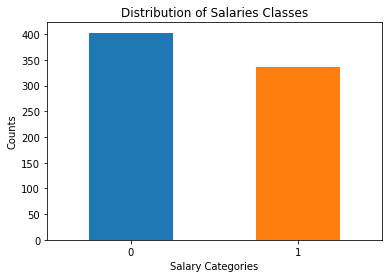

In [14]:
# Plot to show the distribution of Salary Classes
finaldf["Salary_Category"].value_counts().plot.bar()
plt.title("Distribution of Salaries Classes")
plt.xlabel("Salary Categories")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

In [15]:
print("[0]", len(finaldf[finaldf["Salary_Category"] == 0]) / len(finaldf["Salary_Category"]), end=", ")
print("[1]", len(finaldf[finaldf["Salary_Category"] == 1]) / len(finaldf["Salary_Category"]))

[0] 0.5445945945945946, [1] 0.4554054054054054


In [16]:
finaldf.describe()

,Min Salary,Max Salary,Contract,Internship,Temporary,Permanent,Mean Salary,Salary_Category
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,8489.597297,13460.254054,0.290541,0.006757,0.004054,0.408108,6954.103604,0.455405
std,17503.182437,26214.774092,0.454319,0.081977,0.063585,0.491816,2933.242042,0.498344
min,400.000000,801.000000,0.000000,0.000000,0.000000,0.000000,262.500000,0.000000
25%,4000.000000,6500.000000,0.000000,0.000000,0.000000,0.000000,5150.000000,0.000000
50%,5000.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,6750.000000,0.000000
75%,6500.000000,10175.000000,1.000000,0.000000,0.000000,1.000000,8250.000000,1.000000
max,250000.000000,350000.000000,1.000000,1.000000,1.000000,1.000000,25000.000000,1.000000


In [17]:
# Dummy Coding Job Levels
list1 = ['Executive', 'Fresh/entry level', 'Junior Executive', 'Manager', 'Middle Management', 'Non-executive', 'Professional', 'Senior Executive', 'Senior Management', 'Unknown']
for count, x in enumerate(finaldf["Job Level"].apply(lambda x: x.split(", "))):
    for y in list1:
        if y in x:
            finaldf.loc[count, y] = int(1)
        else:
            finaldf.loc[count, y] = int(0)

In [18]:
# Dropping not required columns
finaldf.drop(columns=["Min Salary", "Max Salary", "Salary Paid", "Date Posted", "Job Level", "Unknown"], inplace=True)
finaldf

,Job Title,Job Type,Company Name,Job Location,Job Industry,Contract,Internship,Temporary,Permanent,Job Description,...,Salary_Category,Executive,Fresh/entry level,Junior Executive,Manager,Middle Management,Non-executive,Professional,Senior Executive,Senior Management
0,Data Analyst (JD#4652),"Permanent, Contract",Company Undisclosed,NaN,Banking and Finance,1,0,0,1,a challenging opportunity awaits you! our clie...,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Risk Manager,Full Time,ADYEN SINGAPORE PTE. LTD.,30 HILL STREET 179360,"Risk Management, Information Technology",0,0,0,0,ordering a pizza? buying a pair of trainers? w...,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,BI Consultant,Full Time,INTELLECT MINDS PTE. LTD.,"ANSON CENTRE, 51 ANSON ROAD 079904",Information Technology,0,0,0,0,company overview intellect minds is a singapor...,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Actuarial Data Analyst,Permanent,Company Undisclosed,NaN,Banking and Finance,0,0,0,1,this role requires the use of available system...,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2019 Market Data Analyst,Permanent,BLOOMBERG SINGAPORE PTE. LTD.,"ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989","Banking and Finance, Information Technology",0,0,0,1,you're the type of person who has a passion fo...,...,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Data Analyst,Contract,ALLEGIS GLOBAL SOLUTIONS (SINGAPORE) PTE. LTD.,"SUNTEC TOWER FIVE, 5 TEMASEK BOULEVARD 038985",Banking and Finance,1,0,0,0,allegis global solutions is the exclusive cont...,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Data Analytics Lead,Permanent,TRAVELOKA SERVICES PTE. LTD.,"ROBINSON 77, 77 ROBINSON ROAD 068896",Information Technology,0,0,0,1,"you will be responsible for defining, collecti...",...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,Data Analyst,Full Time,COGNIZANT TECHNOLOGY SOLUTIONS ASIA PACIFIC PT...,"PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...",Information Technology,0,0,0,0,understanding bank’s trade finance applicatio...,...,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,"IT Security Analyst (VPN, Firewall, Proxy, Dat...","Contract, Full Time",TECHCOM SOLUTIONS & CONSULTANCY PTE. LTD.,"SHENTON HOUSE, 3 SHENTON WAY 068805","Banking and Finance, Information Technology",1,0,0,0,"hands on experience on firewall, vpn, proxy (...",...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,"Systems and Data Analyst, Manager (Procurement...","Permanent, Contract, Full Time",Company Undisclosed,NaN,Information Technology,1,0,0,1,- assist with the design and implementation of...,...,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [19]:
# Dummy Coding Job Industries
list2 = []
for x in finaldf["Job Industry"].unique():
    for z in range(len(x.split(", "))):
        if x.split(", ")[z] not in list2:
            list2.append(x.split(", ")[z])            

for count, x in enumerate(finaldf["Job Industry"].apply(lambda x: x.split(", "))):
    for y in list2:
        if y in x:
            finaldf.loc[count, y] = int(1)
        else:
            finaldf.loc[count, y] = int(0)

In [20]:
finaldf.head()

,Job Title,Job Type,Company Name,Job Location,Job Industry,Contract,Internship,Temporary,Permanent,Job Description,...,Travel / Tourism,Sales / Retail,F&B,Accounting / Auditing / Taxation,Architecture / Interior Design,Insurance,Hospitality,Events / Promotions,Security and Investigation,Building and Construction
0,Data Analyst (JD#4652),"Permanent, Contract",Company Undisclosed,NaN,Banking and Finance,1,0,0,1,a challenging opportunity awaits you! our clie...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Risk Manager,Full Time,ADYEN SINGAPORE PTE. LTD.,30 HILL STREET 179360,"Risk Management, Information Technology",0,0,0,0,ordering a pizza? buying a pair of trainers? w...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BI Consultant,Full Time,INTELLECT MINDS PTE. LTD.,"ANSON CENTRE, 51 ANSON ROAD 079904",Information Technology,0,0,0,0,company overview intellect minds is a singapor...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Actuarial Data Analyst,Permanent,Company Undisclosed,NaN,Banking and Finance,0,0,0,1,this role requires the use of available system...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019 Market Data Analyst,Permanent,BLOOMBERG SINGAPORE PTE. LTD.,"ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989","Banking and Finance, Information Technology",0,0,0,1,you're the type of person who has a passion fo...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


------
### Start of Modelling

#### QUESTION 1: Factors that impact salary
- Finding out what factors impact salary, through a classification problem.
- In this case, I will assign `Salary_Category` above the median as 1, `Salary_Category` below or equals the median as 0.
- With the `Salary_Category` category, I will try to use selected features to identify if they impact salary.

Out of the several features I have obtained, I will attempt to build simple models first before expanding with additional features to see if the additional features better predict `Salary_Category`

For a start, I will use `Job Level` as factor that impacts salary.

In [21]:
# All related imports
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Defining stop words for NLP
stop = stopwords.words('english')
stop += ["data"]  # to add on more stopwords

### Simple Case 1: Using `Job Levels` to see if it can predict `Salary_Category`

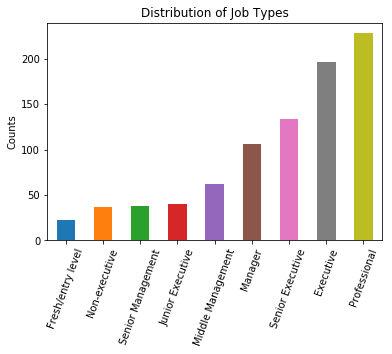

In [23]:
finaldf[['Executive', 'Fresh/entry level', 'Junior Executive', 'Manager', 'Middle Management', 'Non-executive', 'Professional', 'Senior Executive', 'Senior Management']].sum().sort_values().plot.bar()
ax = plt.gca()
plt.title("Distribution of Job Types")
plt.ylabel("Counts")
plt.xticks(rotation = 70)
plt.show()

#### Overall graph visually looks like certain features within the Job Types may be able to explain salary differences
- I will investigate using a few models to see if the models used can predict the Salary category correctly.

In [24]:
# Defining the features for Case 1
features1 = ['Executive', 'Fresh/entry level', 'Junior Executive', 'Manager', 'Middle Management', 'Non-executive', 'Professional', 'Senior Executive', 'Senior Management']
X1 = finaldf[features1]
y1 = finaldf["Salary_Category"]

In [25]:
X_train1, X_test1, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=91)

In [26]:
# Baseline - Majority Class (0) - Indicates how likely to predict the correct value based on majority class randomly
print("Baseline:", len(finaldf[finaldf["Salary_Category"] == 0])/len(finaldf["Salary_Category"]))

Baseline: 0.5445945945945946


##### Using Logistic Regression

In [27]:
lr = LogisticRegression(solver='liblinear', random_state=91)
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
penalties = ['l1','l2']

# Using GridSearch to find best penalty and C parameters
gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=5)
gs.fit(X_train1, y_train)
print(gs.best_params_)
y_pred_lr1 = gs.best_estimator_.predict(X_test1)
y_predp_lr1 = gs.best_estimator_.predict_proba(X_test1)[:, 1]
print(classification_report(y_test, y_pred_lr1, target_names=["Below Median","Above Median"]))

{'C': 0.135, 'penalty': 'l2'}
              precision    recall  f1-score   support

Below Median       0.64      0.81      0.71       118
Above Median       0.69      0.47      0.56       104

 avg / total       0.66      0.65      0.64       222



In [28]:
acc_lr1 = accuracy_score(y_pred_lr1, y_test)
print("Accuracy:", acc_lr1)
roc_lr1 = roc_auc_score(y_test, y_predp_lr1)
print("ROC_AUC:", roc_lr1)
print("Cross Val:", cross_val_score(gs.best_estimator_, X_train1, y_train, cv=5).mean())

Accuracy: 0.6531531531531531
ROC_AUC: 0.6935299869621903
Cross Val: 0.6120799103808812


##### Using Random Forest

In [29]:
rf = RandomForestClassifier(random_state=91)
rf.fit(X_train1, y_train)
y_pred_rf1 = rf.predict(X_test1)
y_predp_rf1 = rf.predict_proba(X_test1)[:,1]
print(classification_report(y_test, y_pred_rf1, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.66      0.81      0.73       118
Above Median       0.71      0.53      0.60       104

 avg / total       0.68      0.68      0.67       222



In [30]:
acc_rf1 = accuracy_score(y_pred_rf1, y_test)
print("Accuracy:", acc_rf1)
roc_rf1 = roc_auc_score(y_test, y_predp_rf1)
print("ROC_AUC:", roc_rf1)
print("Cross Val:", cross_val_score(rf, X_train1, y_train, cv=5).mean())

Accuracy: 0.6756756756756757
ROC_AUC: 0.701923076923077
Cross Val: 0.6022591486183719


In [31]:
features_importance = pd.DataFrame(rf.feature_importances_, index=X_train1.columns,
                                  columns = ["importance"]).sort_values("importance", ascending = False)
features_importance

,importance
Manager,0.155680
Executive,0.155354
Senior Management,0.142865
Junior Executive,0.130570
Professional,0.115606
Middle Management,0.094074
Fresh/entry level,0.081557
Senior Executive,0.079992
Non-executive,0.044303


##### Using K Nearest Neighbours to classify

In [32]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train1, y_train)
y_pred_kn1 = knn.predict(X_test1)
y_predp_kn1 = knn.predict_proba(X_test1)[:,1]
print(classification_report(y_test, y_pred_kn1, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.56      0.91      0.69       118
Above Median       0.65      0.19      0.30       104

 avg / total       0.60      0.57      0.51       222



In [33]:
acc_kn1 = accuracy_score(y_pred_kn1, y_test)
print("Accuracy:", acc_kn1)
roc_kn1 = roc_auc_score(y_test, y_predp_kn1)
print("ROC_AUC:", roc_kn1)
print("Cross Val:", cross_val_score(knn, X_train1, y_train, cv=5).mean())

Accuracy: 0.5720720720720721
ROC_AUC: 0.577534224250326
Cross Val: 0.5540702016430171


In [34]:
pd.DataFrame([[acc_lr1, acc_rf1, acc_kn1],
               [roc_lr1, roc_rf1, roc_kn1]],
            columns=["LogisticReg", "RandomForest", "KNearest"],
            index=["Accuracy Score", "ROC AUC Score"]).rename_axis('Summary:', axis=1)

Summary:,LogisticReg,RandomForest,KNearest
Accuracy Score,0.653153,0.675676,0.572072
ROC AUC Score,0.693530,0.701923,0.577534


#### Case 1 Conclusion:
- Random Forest model gave the best accuracy score of 0.675, based on Job Levels as predictor variables.
- With the 1st simple model done, I'll explore if additional features such as Job Title can further improve the model's score.

-----

### Case 2:  Using `Job Levels` + `Job Title` to predict `Salary_Category`

In [35]:
# Defining feature for Case 2
features2 = finaldf["Job Title"]
y = finaldf["Salary_Category"]

features2_train, features2_test, y_train, y_test = train_test_split(features2, y, test_size=0.3, random_state=91)

# Using CountVectorizer for processing Job Titles
vect = CountVectorizer(lowercase=True,stop_words=stop, ngram_range=(1,1))
features2_train = vect.fit_transform(features2_train)
features2_test = vect.transform(features2_test)

In [36]:
# Concatenating previous Job Levels with Job Titles
X_train2 = pd.concat([X_train1, pd.DataFrame(features2_train.toarray(), columns=vect.vocabulary_, index=X_train1.index)], axis=1)
X_test2 = pd.concat([X_test1, pd.DataFrame(features2_test.toarray(), columns=vect.vocabulary_, index=X_test1.index)], axis=1)

In [37]:
# Using Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=91)
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
penalties = ['l1','l2']

# Using GridSearch to find best penalty and C parameters
gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=5)
gs.fit(X_train2, y_train)
print(gs.best_params_)
y_pred_lr2 = gs.best_estimator_.predict(X_test2)
y_predp_lr2 = gs.best_estimator_.predict_proba(X_test2)[:, 1]
print(classification_report(y_test, y_pred_lr2, target_names=["Below Median","Above Median"]))

{'C': 0.05, 'penalty': 'l2'}
              precision    recall  f1-score   support

Below Median       0.63      0.88      0.73       118
Above Median       0.75      0.41      0.53       104

 avg / total       0.69      0.66      0.64       222



In [38]:
acc_lr2 = accuracy_score(y_pred_lr2, y_test)
print("Accuracy:", acc_lr2)
roc_lr2 = roc_auc_score(y_test, y_predp_lr2)
print("ROC_AUC:", roc_lr2)
print("Cross Val:", cross_val_score(gs.best_estimator_, X_train2, y_train, cv=5).mean())

Accuracy: 0.6621621621621622
ROC_AUC: 0.7497555410691004
Cross Val: 0.6621172516803585


In [39]:
# Using Random Forest
rf = RandomForestClassifier(random_state=91)
rf.fit(X_train2, y_train)
y_pred_rf2 = rf.predict(X_test2)
y_predp_rf2 = rf.predict_proba(X_test2)[:,1]
print(classification_report(y_test, y_pred_rf2, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.62      0.81      0.70       118
Above Median       0.67      0.45      0.54       104

 avg / total       0.65      0.64      0.63       222



In [40]:
acc_rf2 = accuracy_score(y_pred_rf2, y_test)
print("Accuracy:", acc_rf2)
roc_rf2 = roc_auc_score(y_test, y_predp_rf2)
print("ROC_AUC:", roc_rf2)
print("Cross Val:", cross_val_score(rf, X_train2, y_train, cv=5).mean())

Accuracy: 0.6396396396396397
ROC_AUC: 0.7404661016949152
Cross Val: 0.6351568334578044


In [41]:
# Using KNearest Neighbours
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train2, y_train)
y_pred_kn2 = knn.predict(X_test2)
y_predp_kn2 = knn.predict_proba(X_test2)[:,1]
print(classification_report(y_test, y_pred_kn2, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.57      0.91      0.70       118
Above Median       0.69      0.23      0.35       104

 avg / total       0.63      0.59      0.53       222



In [42]:
acc_kn2 = accuracy_score(y_pred_kn2, y_test)
print("Accuracy:", acc_kn2)
roc_kn2 = roc_auc_score(y_test, y_predp_kn2)
print("ROC_AUC:", roc_kn2)
print("Cross Val:", cross_val_score(knn, X_train2, y_train, cv=5).mean())

Accuracy: 0.5900900900900901
ROC_AUC: 0.6149771838331161
Cross Val: 0.6003174010455565


In [43]:
pd.DataFrame([[acc_lr2, acc_rf2, acc_kn2],
              [roc_lr2, roc_rf2, roc_kn2]],
            columns=["LogisticReg", "RandomForest", "KNearest"],
            index=["Accuracy Score", "ROC AUC Score"]).rename_axis('Summary:', axis=1)

Summary:,LogisticReg,RandomForest,KNearest
Accuracy Score,0.662162,0.639640,0.590090
ROC AUC Score,0.749756,0.740466,0.614977


#### Case 2 Conclusion:
- Logistic Regreession and KNearest models' accuracy score improved as compared to previous case.
- Best score still goes to RandomForest from Case 1.

------

### Case 3 Consideration: Could `Job Title` alone better predict `Salary Category`?

In [44]:
# Defining feature for Case 2
features2 = finaldf["Job Title"]
y = finaldf["Salary_Category"]

features2_train, features2_test, y_train, y_test = train_test_split(features2, y, test_size=0.3, random_state=91)

# Using CountVectorizer for processing Job Titles
vect = CountVectorizer(lowercase=True,stop_words=stop, ngram_range=(1,1))
features2_train = vect.fit_transform(features2_train)
features2_test = vect.transform(features2_test)

In [45]:
# Using Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=91)
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
penalties = ['l1','l2']

# Using GridSearch to find best penalty and C parameters
gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=5)
gs.fit(features2_train, y_train)
print(gs.best_params_)
y_pred_lr3 = gs.best_estimator_.predict(features2_test)
y_predp_lr3 = gs.best_estimator_.predict_proba(features2_test)[:, 1]
print(classification_report(y_test, y_pred_lr3, target_names=["Below Median","Above Median"]))

{'C': 0.1, 'penalty': 'l2'}
              precision    recall  f1-score   support

Below Median       0.61      0.85      0.71       118
Above Median       0.68      0.38      0.48       104

 avg / total       0.64      0.63      0.60       222



In [46]:
acc_lr3 = accuracy_score(y_pred_lr3, y_test)
print("Accuracy:", acc_lr3)
roc_lr3 = roc_auc_score(y_test, y_predp_lr3)
print("ROC_AUC:", roc_lr3)
print("Cross Val:", cross_val_score(gs.best_estimator_, features2_train, y_train, cv=5).mean())

Accuracy: 0.6261261261261262
ROC_AUC: 0.7330915906127771
Cross Val: 0.6486370425690813


In [47]:
# Using Random Forest
rf = RandomForestClassifier(random_state=91)
rf.fit(features2_train, y_train)
y_pred_rf3 = rf.predict(features2_test)
y_predp_rf3 = rf.predict_proba(features2_test)[:,1]
print(classification_report(y_test, y_pred_rf3, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.67      0.83      0.74       118
Above Median       0.74      0.54      0.62       104

 avg / total       0.70      0.69      0.69       222



In [48]:
acc_rf3 = accuracy_score(y_pred_rf3, y_test)
print("Accuracy:", acc_rf3)
roc_rf3 = roc_auc_score(y_test, y_predp_rf3)
print("ROC_AUC:", roc_rf3)
print("Cross Val:", cross_val_score(rf, features2_train, y_train, cv=5).mean())

Accuracy: 0.6936936936936937
ROC_AUC: 0.7535446544980443
Cross Val: 0.6427371172516804


In [49]:
# Using KNearest Neighbours
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(features2_train, y_train)
y_pred_kn3 = knn.predict(features2_test)
y_predp_kn3 = knn.predict_proba(features2_test)[:,1]
print(classification_report(y_test, y_pred_kn3, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.57      0.90      0.70       118
Above Median       0.66      0.22      0.33       104

 avg / total       0.61      0.58      0.52       222



In [50]:
acc_kn3 = accuracy_score(y_test, y_pred_kn3)
print("Accuracy:", acc_kn3)
roc_kn3 = roc_auc_score(y_test, y_predp_kn3)
print("ROC_AUC:", roc_kn2)
print("Cross Val:", cross_val_score(knn, features2_train, y_train, cv=5).mean())

Accuracy: 0.581081081081081
ROC_AUC: 0.6149771838331161
Cross Val: 0.5926437640029872


In [51]:
pd.DataFrame([[acc_lr3, acc_rf3, acc_kn3],
              [roc_lr3, roc_rf3, roc_kn3]],
            columns=["LogisticReg", "RandomForest", "KNearest"],
            index=["Accuracy Score", "ROC AUC Score"]).rename_axis('Summary:', axis=1)

Summary:,LogisticReg,RandomForest,KNearest
Accuracy Score,0.626126,0.693694,0.581081
ROC AUC Score,0.733092,0.753545,0.642683


#### Case 3 Conclusion:
- Random Forest model provided the highest score of 0.693 as compared to other models.
- `Job Title` itself is an important feature to predict Salary

------

### Case 4: Using `Job Levels` + `Job Title` + `Job Industry` to predict `Salary_Category`

In [52]:
X4 = finaldf[list2]
y4 = finaldf["Salary_Category"]
X_train4, X_test4, y_train, y_test = train_test_split(X4, y4, test_size=0.3, random_state=91)

In [53]:
# Concatenating previous Job Levels with Job Titles
X_train4 = pd.concat([X_train4, X_train2], axis=1)
X_test4 = pd.concat([X_test4, X_test2], axis=1)

In [54]:
lr = LogisticRegression(solver='liblinear', random_state=91)
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
penalties = ['l1','l2']

# Using GridSearch to find best penalty and C parameters
gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=5)
gs.fit(X_train4, y_train)
print(gs.best_params_)
y_pred_lr4 = gs.best_estimator_.predict(X_test4)
y_predp_lr4 = gs.best_estimator_.predict_proba(X_test4)[:, 1]
print(classification_report(y_test, y_pred_lr4, target_names=["Below Median","Above Median"]))

{'C': 1, 'penalty': 'l1'}
              precision    recall  f1-score   support

Below Median       0.70      0.84      0.76       118
Above Median       0.76      0.59      0.66       104

 avg / total       0.73      0.72      0.72       222



In [55]:
acc_lr4 = accuracy_score(y_pred_lr4, y_test)
print("Accuracy:", acc_lr4)
roc_lr4 = roc_auc_score(y_test, y_predp_lr4)
print("ROC_AUC:", roc_lr4)
print("Cross Val:", cross_val_score(gs.best_estimator_, X_train4, y_train, cv=5).mean())

Accuracy: 0.7207207207207207
ROC_AUC: 0.8186114732724903
Cross Val: 0.6813666915608664


In [56]:
# Using Random Forest
rf = RandomForestClassifier(random_state=91)
rf.fit(X_train4, y_train)
y_pred_rf4 = rf.predict(X_test4)
y_predp_rf4 = rf.predict_proba(X_test4)[:,1]
print(classification_report(y_test, y_pred_rf4, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.65      0.81      0.72       118
Above Median       0.70      0.51      0.59       104

 avg / total       0.67      0.67      0.66       222



In [57]:
acc_rf4 = accuracy_score(y_pred_rf4, y_test)
print("Accuracy:", acc_rf4)
roc_rf4 = roc_auc_score(y_test, y_predp_rf4)
print("ROC_AUC:", roc_rf4)
print("Cross Val:", cross_val_score(rf, X_train4, y_train, cv=5).mean())

Accuracy: 0.6666666666666666
ROC_AUC: 0.7664602346805736
Cross Val: 0.6390029873039582


In [58]:
# Using KNearest Neighbours
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train4, y_train)
y_pred_kn4 = knn.predict(X_test4)
y_predp_kn4 = knn.predict_proba(X_test4)[:,1]
print(classification_report(y_test, y_pred_kn4, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.63      0.92      0.75       118
Above Median       0.80      0.39      0.53       104

 avg / total       0.71      0.67      0.65       222



In [59]:
acc_kn4 = accuracy_score(y_pred_kn4, y_test)
print("Accuracy:", acc_kn4)
roc_kn4 = roc_auc_score(y_test, y_predp_kn4)
print("ROC_AUC:", roc_kn4)
print("Cross Val:", cross_val_score(knn, X_train4, y_train, cv=5).mean())

Accuracy: 0.6711711711711712
ROC_AUC: 0.7427477183833116
Cross Val: 0.6118558625840178


In [60]:
pd.DataFrame([[acc_lr4, acc_rf4, acc_kn4],
              [roc_lr4, roc_rf4, roc_kn4]],
            columns=["LogisticReg", "RandomForest", "KNearest"],
            index=["Accuracy Score", "ROC AUC Score"]).rename_axis('Summary:', axis=1)

Summary:,LogisticReg,RandomForest,KNearest
Accuracy Score,0.720721,0.666667,0.671171
ROC AUC Score,0.818611,0.766460,0.742748


#### Conclusion for Case 4:
- Accuracy score for all 3 models improved as compared to Case 2 where I did not add `Job Industry` in it.
- Logistic Regression has the best accuracy score.

------

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


In [61]:
# Defining Classification Problem (if Job Title contains Scientist)
finaldf["is_datascientist"] = 0
finaldf.loc[(finaldf["Job Title"].str.lower().str.contains("scientist")), "is_datascientist"] = 1

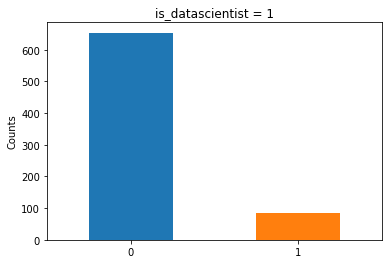

In [62]:
# Distribution Plot of Class 0 & 1
finaldf["is_datascientist"].value_counts().plot.bar()
plt.title("is_datascientist = 1")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

In [63]:
# Identifying model baseline
baseline6 = len(finaldf[finaldf["is_datascientist"] == 0]) / len(finaldf["is_datascientist"])
print("Baseline:", baseline6)

Baseline: 0.8837837837837837


In [64]:
# Building a vocab list of skills
vocab = ["r", "c++", "java", "javascript", "python",
         "sql", "tableau", ".net", "c#", "etl",
         "stata", "edm", "xml", "sas", "sybase",
         "excel", "hadoop", "hive", "spark", "scala",
         "mapreduce", "rdbms", "matlab", "mssql", "mongodb",
         "powerpoint", "sharepoint", "cognos"]

In [65]:
# Using Job Description to predict whether Job is Data Scientist or not
X6 = finaldf['Job Description']
y6 = finaldf['is_datascientist']
desc1_train, desc1_test, y_train, y_test = train_test_split(X6, y6, test_size=0.3, random_state=91)

cvz = TfidfVectorizer(stop_words=stop, ngram_range=(1, 1), max_features=200)
stop += ["requirements", "work"]
desc1_train = cvz.fit_transform(desc1_train, y_train)
desc1_test = cvz.transform(desc1_test)

desc1_traindf = pd.DataFrame(desc1_train.toarray(), columns=cvz.get_feature_names(), index=X_train1.index)

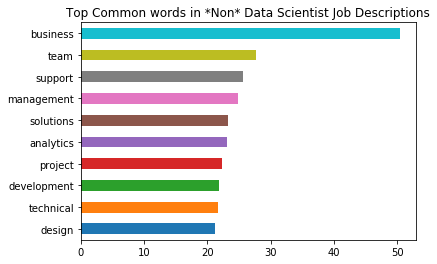

In [66]:
# Top 10 Common Words in Non Data Scientist Job Descriptions
desc_freq=desc1_traindf.loc[finaldf["is_datascientist"] == 0].sum(axis=0)
desc_freq.sort_values(ascending = False).iloc[0:10].sort_values().plot(kind='barh')
plt.title('Top Common words in *Non* Data Scientist Job Descriptions')
plt.show()

#### Top 5 Common Words for Non Data Scientist Job Descriptions:
- business, team, support, management, solutions

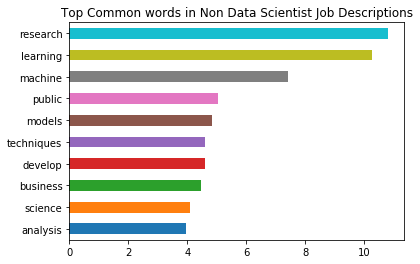

In [67]:
# Top 10 Common Words in Data Scientist Job Descriptions
desc_freq=desc1_traindf.loc[finaldf["is_datascientist"] == 1].sum(axis=0)
desc_freq.sort_values(ascending = False).iloc[0:10].sort_values().plot(kind='barh')
plt.title('Top Common words in Data Scientist Job Descriptions')
plt.show()

#### Top 5 Common Words for Data Scientist Job Descriptions:
- research, learning, machine, public, models

In [68]:
# Modelling Time:
# To use Logistic Regression, Random Forest, KNearest models to see their performance

In [69]:
# Using Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=91)
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
penalties = ['l1','l2']

# Using GridSearch to find best penalty and C parameters
gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=5)
gs.fit(desc1_train, y_train)
print(gs.best_params_)
y_pred_lr6 = gs.best_estimator_.predict(desc1_test)
y_predp_lr6 = gs.best_estimator_.predict_proba(desc1_test)[:, 1]
print(classification_report(y_test, y_pred_lr6, target_names=["Others","Data Scientist"]))
roc_lr6 = roc_auc_score(y_test, y_predp_lr6)
print("ROC Score:", roc_lr6)

{'C': 5, 'penalty': 'l2'}
                precision    recall  f1-score   support

        Others       0.92      0.97      0.95       196
Data Scientist       0.62      0.38      0.48        26

   avg / total       0.89      0.90      0.89       222

ROC Score: 0.9099293563579278


In [70]:
# Using Random Forest
rf = RandomForestClassifier(random_state=91)
rf.fit(desc1_train, y_train)
y_pred_rf6 = rf.predict(desc1_test)
y_predp_rf6 = rf.predict_proba(desc1_test)[:,1]
print(classification_report(y_test, y_pred_rf6, target_names=["Others","Data Scientist"]))
roc_rf6 = roc_auc_score(y_test, y_predp_rf6)
print("ROC Score:", roc_rf6)

                precision    recall  f1-score   support

        Others       0.91      0.98      0.95       196
Data Scientist       0.67      0.31      0.42        26

   avg / total       0.89      0.90      0.88       222

ROC Score: 0.8549843014128728


In [71]:
# Using KNearest Neighbours
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(desc1_train, y_train)
y_pred_kn6 = knn.predict(desc1_test)
y_predp_kn6 = knn.predict_proba(desc1_test)[:,1]
print(classification_report(y_test, y_pred_kn6, target_names=["Others","Data Scientist"]))
roc_kn6 = roc_auc_score(y_test, y_predp_kn6)
print("ROC Score:", roc_kn6)

                precision    recall  f1-score   support

        Others       0.91      0.98      0.94       196
Data Scientist       0.60      0.23      0.33        26

   avg / total       0.87      0.89      0.87       222

ROC Score: 0.8046507064364207


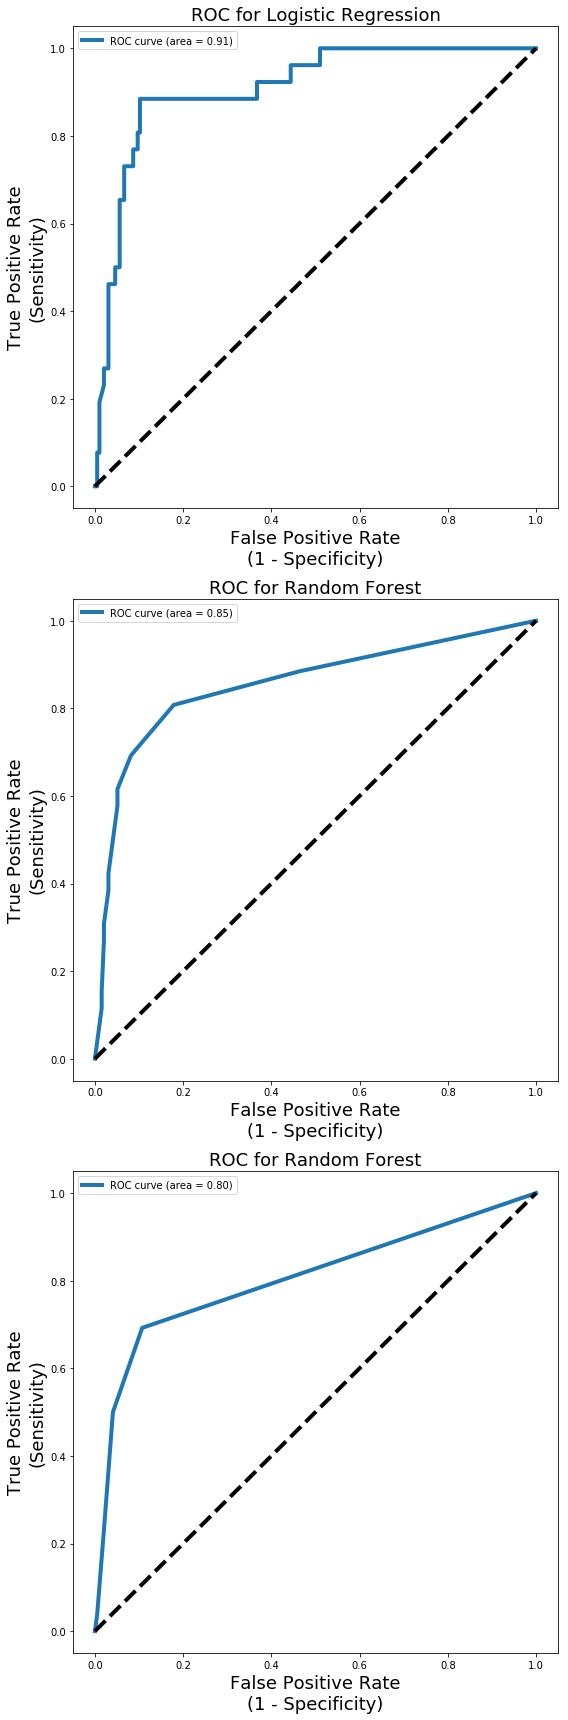

In [72]:
fig, ax = plt.subplots(3, 1, figsize=[8,24])

# Logistic Regression ROC Plot
plt.subplot(311)
fpr, tpr, _ = roc_curve(y_test, y_predp_lr6)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate\n(1 - Specificity)', fontsize=18)
plt.ylabel('True Positive Rate\n(Sensitivity)', fontsize=18)
plt.title('ROC for Logistic Regression', fontsize=18)
plt.legend(loc="best")

# Random Forest ROC Plot
plt.subplot(312)
fpr, tpr, _ = roc_curve(y_test, y_predp_rf6)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate\n(1 - Specificity)', fontsize=18)
plt.ylabel('True Positive Rate\n(Sensitivity)', fontsize=18)
plt.title('ROC for Random Forest', fontsize=18)
plt.legend(loc="best")

# KNearest ROC Plot
plt.subplot(313)
fpr, tpr, _ = roc_curve(y_test, y_predp_kn6)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate\n(1 - Specificity)', fontsize=18)
plt.ylabel('True Positive Rate\n(Sensitivity)', fontsize=18)
plt.title('ROC for Random Forest', fontsize=18)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [73]:
pd.DataFrame([[roc_lr6, roc_rf6, roc_kn6],
              [baseline6, baseline6, baseline6]],
            columns=["LogisticReg", "RandomForest", "KNearest"],
            index=["ROC AUC Score", "Baseline"]).rename_axis('Summary:', axis=1)

Summary:,LogisticReg,RandomForest,KNearest
ROC AUC Score,0.909929,0.854984,0.804651
Baseline,0.883784,0.883784,0.883784


#### Conclusion:
- Logistic Regression Model was the better model to classify if the job title included Data Scientist or not, based on ROC Score.
- As the number of job titles containing Data Scientist was much lesser than that of non Data Scientists, it resulted in a unbalanced class distribution.
- Due to above, we should consider ROC score instead of Accuracy score to determine the model's performance.